# Diabetes Prediction

###  Dataset Link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Load Dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

# Exploring Dataset

In [3]:
df.head()  #Returns first 5 rows of DataFrame, if parameter is passed i.e. head(n) it returns 'n' rows of DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape   #Returns shape of DataFrame i.e. number of rows and columns  

(2000, 9)

We can observe that the dataset contain 2000 rows and 9 columns.

In [5]:
df.columns   #Returns the column name of DataFrame

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

'Outcome' is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not.

In [6]:
df.groupby('Outcome').size()

Outcome
0    1316
1     684
dtype: int64

We can identify that out of 2000 persons, 1316 are labeled as 0(non-diabetic) and 684 as 1(diabetic).

In [7]:
df.dtypes     #Returns the data type of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info()    #Returns a concise summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
df.describe().T    #Returns basic statistics on all numeric columns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
df.isna().any()    #Returns True if there is missing value, else False

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

We can observe that there are no data points missing in the dataset.

In [11]:
df = df.rename(columns={'BloodPressure':'BP', 'DiabetesPedigreeFunction':'DPF'})

In [12]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


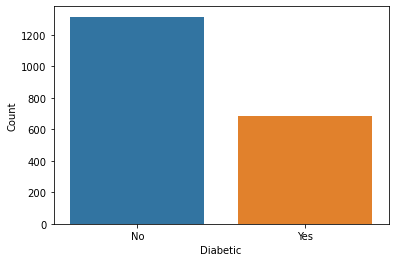

In [13]:
sns.countplot(x='Outcome', data=df)
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Data Cleaning

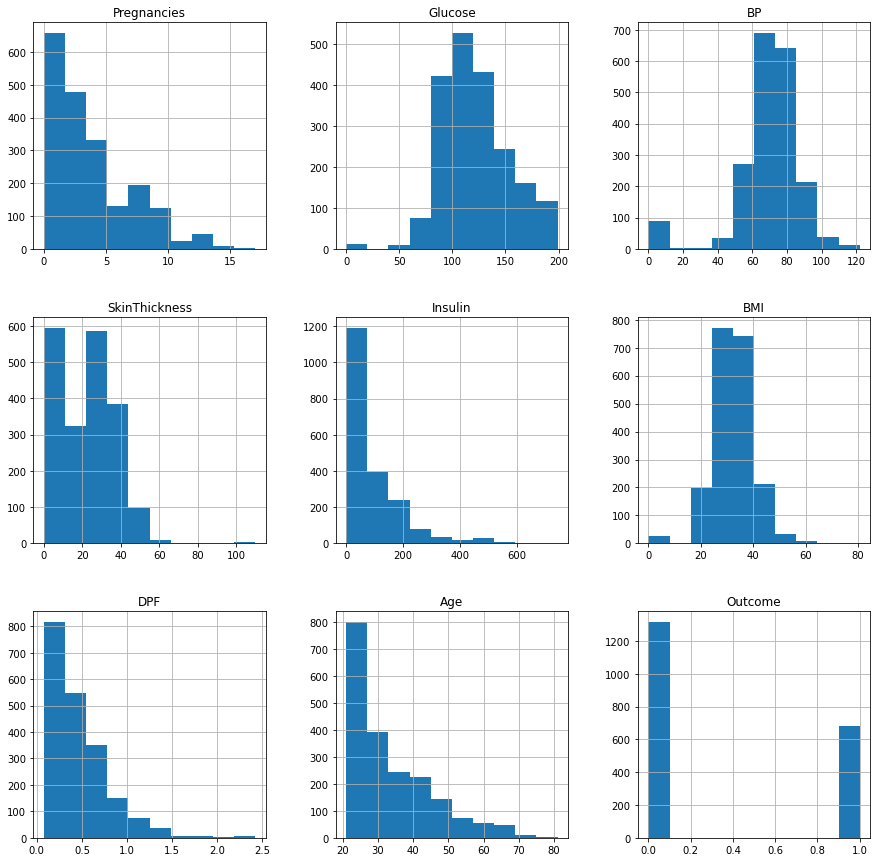

In [14]:
df.hist(figsize=(15,15))
plt.show()

When analyzing the histograms we can identify that there are some outliers in some columns.Lets analyze those outliers further.

### Handling Outliers

**Blood Pressure(BP):** By observing the data we can see that there are 0 values for BP and it is evident that the readings of the dataset seem wrong because a living person cannot have a diastolic BP of 0.Lets observe the data and find the count of 0 readings.

In [15]:
print('Total:',df[df['BP']==0].shape[0])

Total: 90


By observing the data we can see 90 counts where the value is 0.

In [16]:
df[df['BP']==0].groupby('Outcome')['Age'].count()

Outcome
0    51
1    39
Name: Age, dtype: int64

**Glucose Levels:** Even after fasting glucose levels can't be zero.Therefore zero is an invalid reading.

In [17]:
print('Total:',df[df['Glucose']==0].shape[0])

Total: 13


By observing the data we can see 13 counts where the value is 0.

In [18]:
df[df['Glucose']==0].groupby('Outcome')['Age'].count()

Outcome
0    7
1    6
Name: Age, dtype: int64

**SkinThickness:** For normal people skin fold thickness can't be less than 10mm better yet zero.

In [19]:
print('Total:',df[df['SkinThickness']==0].shape[0])

Total: 573


By observing the data we can see 573 counts where the value is 0.

In [20]:
df[df['SkinThickness']==0].groupby('Outcome')['Age'].count()

Outcome
0    356
1    217
Name: Age, dtype: int64

**BMI:** Shouldn't be zero or close to zero unless the person is really underweight which could be life-threatening

In [21]:
print('Total:', df[df['BMI']==0].shape[0])

Total: 28


By observing the data we can see 28 counts where the value is 0.

In [22]:
df[df['BMI']==0].groupby('Outcome')['Age'].count()

Outcome
0    25
1     3
Name: Age, dtype: int64

**Insulin:** In a rare situation a person can have zero insulin.Lets observe our dataset.

In [23]:
print('Total:', df[df['Insulin']==0].shape[0])

Total: 956


By observing tha data we can find that there is total of 956 counts.

In [24]:
df[df['Insulin']==0].groupby('Outcome')['Age'].count()

Outcome
0    609
1    347
Name: Age, dtype: int64

Lets replace all the 0s with NaN and then put their mean/median values according to our observations.

In [25]:
df[['Glucose', 'BP', 'SkinThickness', 'Insulin',
         'BMI', 'DPF']] = df[['Glucose', 'BP', 'SkinThickness', 'Insulin',
       'BMI', 'DPF']].replace(0, np.NaN)

In [26]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [27]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BP'].fillna(df['BP'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [28]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


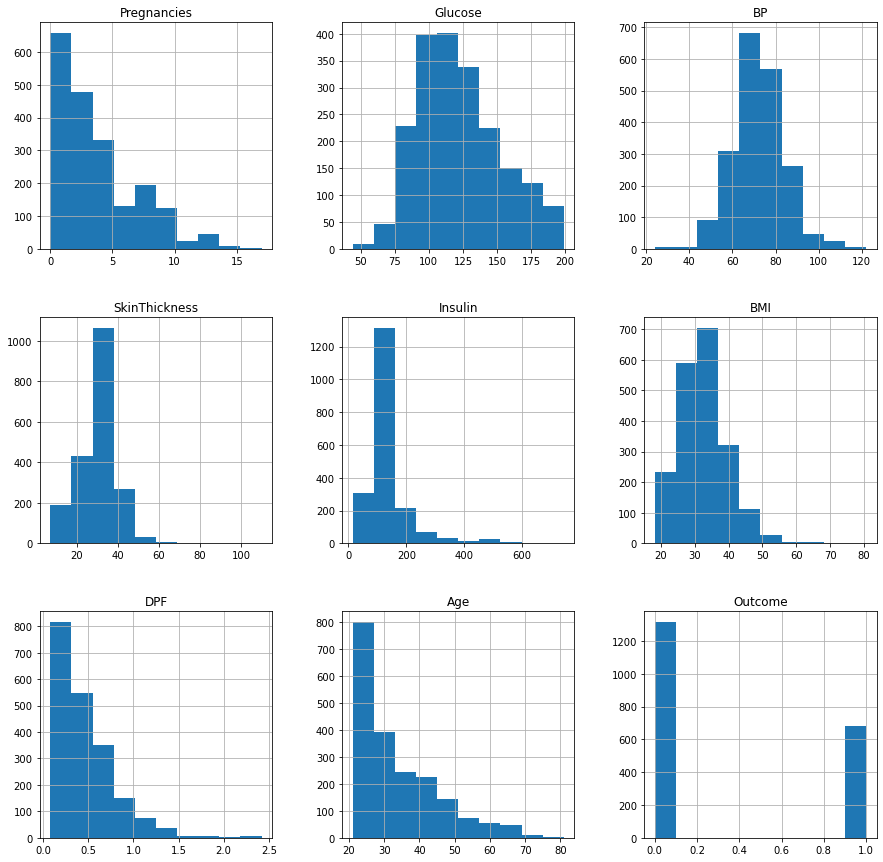

In [29]:
df.hist(figsize=(15,15))
plt.show()

In [30]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Model Selection

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
X = df.drop(columns=['Outcome'])

y = df['Outcome']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df.Outcome, random_state=0)

print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [34]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [35]:
def best_model(X, y):
    models = {
        'LR': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
       
        'DT': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'RF': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
         
        'KNN': {
            'model': KNeighborsClassifier(algorithm='auto'),
            'parameters': {
                'n_neighbors': [5,10,15,20,25],
                'weights' : ['uniform', 'distance'] 
               }
        },
        
        'SVC': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },
        
        'GB': {
            'model': GradientBoostingClassifier(criterion='friedman_mse'),
            'parameters': {
                'loss': ['deviance', 'exponential']
               }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

best_model(X_train, y_train)

,model,best_parameters,score
0,LR,{'C': 1},0.788125
1,DT,"{'criterion': 'gini', 'max_depth': 10}",0.896875
2,RF,{'n_estimators': 200},0.954375
3,KNN,"{'n_neighbors': 15, 'weights': 'distance'}",0.951250
4,SVC,"{'C': 20, 'kernel': 'rbf'}",0.877500
5,GB,{'loss': 'deviance'},0.878750


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 95%


In [38]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

# Model Evaluation

In [39]:
# Confusion matrix for test set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[259,   4],
       [  5, 132]])

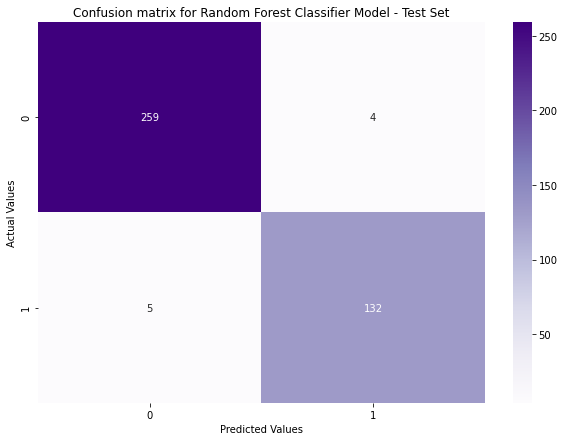

In [42]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Purples", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 97.75%


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.97      0.96      0.97       137

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400



In [46]:
# Creating a confusion matrix for training set
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[1053,    0],
       [   1,  546]])

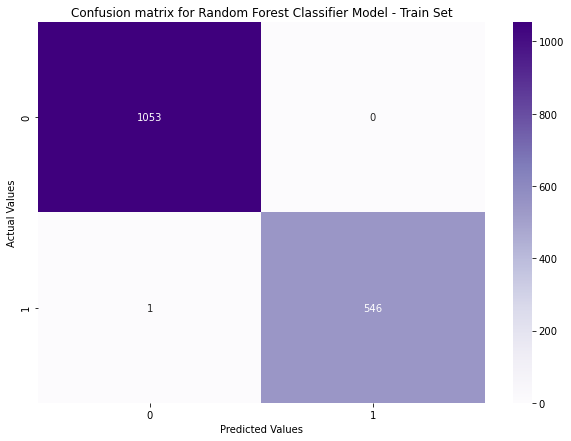

In [47]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Purples", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [49]:
score = round(accuracy_score(y_train, y_pred_train),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.94%


In [51]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       547

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Model Predictions

In [52]:
def predict_diabetes(Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BP)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = ss.transform(x)

    return classifier.predict(x)

In [53]:
prediction = predict_diabetes(4, 85, 79, 18, 72, 28.3, 0.498, 27)[0]
if prediction:
  print('Sorry! You have diabetes.')
else:
  print("Voila! You don't have diabetes.")

Voila! You don't have diabetes.


In [55]:
prediction = predict_diabetes(6, 122, 95, 13, 88, 24.7, 0.491, 63)[0]
if prediction:
  print('Sorry! You have diabetes.')
else:
  print("Voila! You don't have diabetes.")

Voila! You don't have diabetes.


In [56]:
prediction = predict_diabetes(1, 120, 90, 27, 149, 33.4, 0.393, 42)[0]
if prediction:
  print('Sorry! You have diabetes.')
else:
  print("Voila! You don't have diabetes.")

Sorry! You have diabetes.
